
# Shared rides with pricing - Delft 

 ### Choice Function (Deterministic):
 `pool_price.py`
 * Pickup Distance: distance from driver initial position to the first pickup point
 * Travel Distance: distance from driver's initial position to the drop off point of the last passenger
 * Operating Cost: This include all the expenses
 * Profit: Driver revenue to serve the request
            
 
  ### KPI:
   
   * Profit of Individual driver
   * Profit of all the drivers
   * No.of rejected rides
   * U - PAX (Utility) 
  
   ### TBD- Choice Function (Probablistic):
  
  * choice logic to be applied inside `pool_price.py` 
  * P(R)= exp(beta * Profit_R)/ sum_all the rides( exp(beta * Profit_R)
 



-------------------------------------------------------------------------------------------------------

# Pricing and Driver Earnings for a Two-Sided Mobility Platform: A Case of Amsterdam, the Netherlands

or 

# The Effects of Profit-Based Pricing on Driver Earnings and Performance of Two-Sided Mobility Platforms

# Abstract  

In this paper, we investigate how the  pricing of ride-pooling affects driver earnings. We also examine how profit-based setting affects these performance indicators. To this end, we applied a matching algorithm  to the case of ride-pooling and give a choice set to the driver for the case of Amsterdam, the Netherlands. For our simulation, we utilize an agent-based simulator reproducing the transport systems for two-sided mobility platforms (like Uber and Lyft) and applied three state-of-the-art pricing strategies such as <strong>profit maximization</strong>,  <strong>solo ride-hailing</strong>, and <strong>nearest pickup ride-pooling</strong>. We find that the profit maximization pricing strategy outperforms the other and traveler utility can be further improved by $\%X$ while reducing the total cost to serve the pooled rides. While offering a discount for profit maximization travel time is significantly higher $\%X$  than for private rides. 

-------------------------------------------------------------------------------------------------------

## Mode of Simulation 

Three type of simulation 

<strong>1. Profit maximization</strong> 

<strong>2. Solo ride-hailing</strong>

<strong>3. Nearest pickup ride-pooling</strong>

## Load ExMAS and MaaSSim


In [1]:
%load_ext autoreload
%autoreload 2
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand, generate_demand, generate_vehicles, initialize_df  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.visualizations import plot_veh
from MaaSSim.shared import prep_shared_rides
import logging
import matplotlib.pyplot as plt

import pandas as pd
import ExMAS

## Delft, Netherlands

In [2]:
params = get_config('../../data/config/delft.json')  # load configuration

params.times.pickup_patience = 3600 # 1 hour of simulation
params.simTime = 1 # 6 minutes hour of simulation
params.nP = 500 # reuqests (and passengers)
params.nV = 20 # vehicles



## Parameters for ExMAS

In [3]:
params.t0 = pd.Timestamp.now()
params.shareability.avg_speed = params.speeds.ride
params.shareability.shared_discount = 0.25
params.shareability.delay_value = 1
params.shareability.WtS = 1.3
params.shareability.price = 1.5 #eur/km
params.shareability.VoT = 0.0035 #eur/s
params.shareability.matching_obj = 'u_veh' #minimize VHT for vehicles
params.shareability.pax_delay = 0
params.shareability.horizon = 600
params.shareability.max_degree = 4
params.shareability.nP = params.nP
params.shareability.share = 1
params.shareability.without_matching = True
params.shareability.operating_cost = 0.5
params.shareability.comm_rate = 0.2

inData = load_G(inData, params)  # load network graph 

inData = generate_demand(inData, params, avg_speed = False)
inData.vehicles = generate_vehicles(inData,params.nV)
inData.vehicles.platform = inData.vehicles.apply(lambda x: 0, axis = 1)
inData.passengers.platforms = inData.passengers.apply(lambda x: [0], axis = 1)
inData.requests['platform'] = inData.requests.apply(lambda row: inData.passengers.loc[row.name].platforms[0], axis = 1) 
inData.platforms = initialize_df(inData.platforms)
inData.platforms.loc[0]=[1,'Uber',30]
params.shareability.share = 1
params.shareability.without_matching = True



# Strategy 1: 
# params.kpi = 1 (Profit Maximazation)


### Profit Mazimization - Begin 

In [4]:
inData = ExMAS.main(inData, params.shareability, plot=False) # create shareability graph (ExMAS) 

30-03-23 13:39:22-INFO-Initializing pairwise trip shareability between 500 and 500 trips.
30-03-23 13:39:22-INFO-creating combinations
30-03-23 13:39:22-INFO-249500	 nR*(nR-1)
30-03-23 13:39:25-INFO-Reduction of feasible pairs by 99.43%
30-03-23 13:39:25-INFO-Degree 2 	Completed
30-03-23 13:39:25-INFO-trips to extend at degree 2 : 3892
30-03-23 13:39:29-INFO-At degree 2 feasible extensions found out of 1277 searched
30-03-23 13:39:29-INFO-Degree 3 	Completed
30-03-23 13:39:29-INFO-trips to extend at degree 3 : 1277
30-03-23 13:39:30-INFO-At degree 3 feasible extensions found out of 266 searched
30-03-23 13:39:30-INFO-Degree 4 	Completed
30-03-23 13:39:30-INFO-Max degree reached 4
30-03-23 13:39:30-INFO-Trips still possible to extend at degree 4 : 266


In [5]:
inData = prep_shared_rides(inData, params.shareability) # prepare schedules

30-03-23 13:39:31-INFO-Matching 500 trips to 5935 rides in order to min u_veh
30-03-23 13:39:33-INFO-Problem solution: Optimal. 
Total costs for single trips:        132,964 
reduced by matching to:               94,235


In [6]:
inData.sblts.rides

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,...,row,selected,nodes,req_id,sim_schedule,ttrav,dist,fare,commission,driver_revenue
0,[0],5.708500,308,1,[5.7085],"[0, 308]",[0],[0],1,0,...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44812602, 1435362490]","[None, 0, 0]",node time req_id od 0 ...,308,3.08,4.630500,0.926100,3.7044
1,[1],5.076500,274,1,[5.076499999999999],"[2, 274]",[1],[1],1,1,...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1584013984, 44832709]","[None, 1, 1]",node time req_id od 0 ...,274,2.74,4.117500,0.823500,3.2940
2,[2],3.222000,174,1,[3.222],"[18, 174]",[2],[2],1,2,...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 894421661, 1393024899]","[None, 2, 2]",node time req_id od 0 ...,174,1.74,2.613000,0.522600,2.0904
3,[3],1.043500,56,1,[1.0435],"[38, 56]",[3],[3],1,3,...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 3377240326, 3377240345]","[None, 3, 3]",node time req_id od 0 ...,56,0.56,0.847500,0.169500,0.6780
4,[4],2.816500,152,1,[2.8165],"[43, 152]",[4],[4],1,4,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 582000012, 44847481]","[None, 4, 4]",node time req_id od 0 N...,152,1.52,2.284500,0.456900,1.8276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,"[73, 77, 93, 128]",24.524150,834,42,"[7.2147, 6.805300000000001, 7.800875, 2.703275]","[540.0, 13, 244, 227, 44, 13, 117, 176]","[73, 77, 93, 128]","[77, 73, 128, 93]",4,5930,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 5750227863, 44820494, 1530303735, 34201...","[None, 73, 77, 93, 128, 77, 73, 128, 93]",node time req_id od 0 ...,834,8.34,15.183000,3.036600,12.1464
5931,"[26, 28, 37, 42]",14.982800,467,42,"[4.605075, 3.98215, 4.344025, 2.05155]","[144.0, 58, 138, 112, 0, 34, 79, 46]","[26, 28, 37, 42]","[28, 26, 42, 37]",4,5931,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1413910820, 298509326, 4300909744, 1576...","[None, 26, 28, 37, 42, 28, 26, 42, 37]",node time req_id od 0 ...,467,4.67,9.859500,1.971900,7.8876
5932,"[62, 57, 58, 105]",25.311450,1022,40,"[6.9116, 5.1885, 4.5556, 8.65575]","[403.0, 103, 80, 241, 15, 17, 57, 509]","[62, 57, 58, 105]","[57, 58, 62, 105]",4,5932,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44843105, 1435362394, 44818482, 4476548...","[None, 62, 57, 58, 105, 57, 58, 62, 105]",node time req_id od 0 ...,1022,10.22,16.193250,3.238650,12.9546
5933,"[62, 57, 58, 88]",21.054525,662,40,"[7.1846, 5.2431, 4.4009, 4.225925]","[403.0, 103, 80, 187, 82, 17, 57, 136]","[62, 57, 58, 88]","[57, 58, 62, 88]",4,5933,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44843105, 1435362394, 44818482, 4246422...","[None, 62, 57, 58, 88, 57, 58, 62, 88]",node time req_id od 0 ...,662,6.62,13.465125,2.693025,10.7721


In [7]:
params.kpi = 1

In [8]:
sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate

#sim.res[0].veh_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/veh{}.csv'.format(i))

30-03-23 13:40:22-INFO-Matching 500 trips to 5935 rides in order to min u_veh
30-03-23 13:40:24-INFO-Problem solution: Optimal. 
Total costs for single trips:        132,964 
reduced by matching to:               94,235
0.5
30-03-23 13:41:18-CRITICAL-this is request 0 with [0, 560, 629, 641, 1422, 1704, 1904, 1932, 2341, 2917] available rides.
30-03-23 13:41:18-CRITICAL-ride 0 available [1]
30-03-23 13:41:18-CRITICAL-ride 560 available [1, 0]
30-03-23 13:41:18-CRITICAL-ride 629 available [1, 0]
30-03-23 13:41:18-CRITICAL-ride 641 available [1, 0]
30-03-23 13:41:18-CRITICAL-ride 1422 available [1, 0]
30-03-23 13:41:18-CRITICAL-ride 1704 available [1, 0]
30-03-23 13:41:18-CRITICAL-ride 1904 available [1, 0]
30-03-23 13:41:18-CRITICAL-ride 1932 available [0, 1]
30-03-23 13:41:18-CRITICAL-ride 2341 available [1, 0]
30-03-23 13:41:18-CRITICAL-ride 2917 available [1, 0]
30-03-23 13:41:18-CRITICAL-this is reuqest 0 with [0, 560, 629, 641, 1422, 1704, 1904, 1932, 2341, 2917] still available ri

In [9]:
df = sim.res[0].veh_exp

In [10]:
import seaborn as sns

In [11]:
df

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,False,0,0,0.0,0.0,0,0.0,0,...,0,0,10799.0,0.0,0.0,0.0,0.0,10799.0,0.000,0.0000
2,9.0,0.0,False,0,0,143.0,15.0,0,147.0,0,...,0,0,7705.0,1714.0,0.0,805.0,432.0,4754.0,29.467,0.6600
3,4.0,0.0,False,0,0,141.0,15.0,0,60.0,0,...,0,0,9171.0,784.0,0.0,508.0,195.0,7684.0,9.709,3.1572
4,9.0,0.0,False,0,0,114.0,15.0,0,254.0,0,...,0,0,7645.0,1791.0,0.0,710.0,539.0,4605.0,32.714,6.5844
5,3.0,0.0,False,0,0,155.0,2.0,0,306.0,0,...,0,0,9390.0,419.0,0.0,437.0,398.0,8136.0,9.076,5.9436
6,7.0,0.0,False,0,0,162.0,15.0,0,202.0,0,...,0,0,8017.0,1306.0,0.0,887.0,427.0,5397.0,19.643,6.8418
7,13.0,0.0,False,0,0,106.0,15.0,0,182.0,0,...,0,0,7987.0,1526.0,0.0,593.0,587.0,5281.0,29.424,2.3427
8,8.0,0.0,False,0,0,155.0,15.0,0,113.0,0,...,0,0,0.0,1149.0,3600.0,1070.0,428.0,-6247.0,27.109,5.4972
9,17.0,0.0,False,0,0,103.0,15.0,0,196.0,0,...,0,0,6617.0,2162.0,0.0,1196.0,721.0,2538.0,47.497,9.5103


In [12]:
df.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/ProfitMax.csv')

In [13]:
sim.res[0].veh_exp['REVENUE'].to_list()

[0.0,
 0.66,
 3.1571999999999996,
 6.5844,
 5.943600000000001,
 6.841800000000001,
 2.3427,
 5.497200000000001,
 9.510300000000003,
 5.296799999999999,
 1.584,
 2.3844000000000003,
 4.5747,
 2.5380000000000003,
 4.3254,
 0.42119999999999996,
 3.5496000000000003,
 4.2228,
 0.0,
 2.2932]

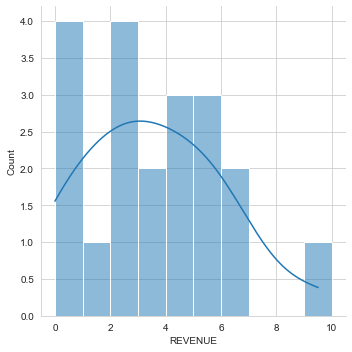

In [14]:
import seaborn as sns
sns.set_style("whitegrid")

df = sim.res[0].veh_exp

#sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

#ax = sns.histplot(df.REVENUE, kde=True, binwidth=1)


ax = sns.displot(df.REVENUE, kde=True, binwidth=1)


#ax =sns.histplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total Revenue of all the driver 

In [15]:
sim.res[0].all_kpi # All driver revenue 

71.72730000000001

# Strategy 2: 

# params.kpi = 2 (Pooled Ride - Nearest) 


In [16]:
params.kpi = 2

In [17]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate


30-03-23 13:42:25-WARNING-Setting up 1h simulation at 2023-03-30 13:09:20 for 20 vehicles and 500 passengers in Delft, Netherlands
0.5
30-03-23 13:42:27-CRITICAL-this is request 0 with [0, 560, 629, 641, 1422, 1704, 1904, 1932, 2341, 2917] available rides.
30-03-23 13:42:27-CRITICAL-ride 0 available [1]
30-03-23 13:42:27-CRITICAL-ride 560 available [1, 0]
30-03-23 13:42:27-CRITICAL-ride 629 available [1, 0]
30-03-23 13:42:27-CRITICAL-ride 641 available [1, 0]
30-03-23 13:42:27-CRITICAL-ride 1422 available [1, 0]
30-03-23 13:42:27-CRITICAL-ride 1704 available [1, 0]
30-03-23 13:42:27-CRITICAL-ride 1904 available [1, 0]
30-03-23 13:42:27-CRITICAL-ride 1932 available [0, 1]
30-03-23 13:42:27-CRITICAL-ride 2341 available [1, 0]
30-03-23 13:42:27-CRITICAL-ride 2917 available [1, 0]
30-03-23 13:42:27-CRITICAL-this is reuqest 0 with [0, 560, 629, 641, 1422, 1704, 1904, 1932, 2341, 2917] still available rides.
Pooled rides
30-03-23 13:42:27-CRITICAL-vehicle 1 has 10 choices
0.5
30-03-23 13:42:

In [18]:
df = sim.res[0].veh_exp

In [19]:
df

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,False,0,0,0.0,0.0,0,0.0,0,...,0,0,10799.0,0.0,0.0,0.0,0.0,10799.0,0.000,0.0000
2,14.0,0.0,False,0,0,93.0,15.0,0,151.0,0,...,0,0,7493.0,1682.0,0.0,945.0,586.0,4280.0,36.930,2.4768
3,17.0,0.0,False,0,0,118.0,15.0,0,319.0,0,...,0,0,6682.0,1930.0,0.0,1225.0,844.0,2683.0,36.906,7.2297
4,9.0,0.0,False,0,0,147.0,15.0,0,200.0,0,...,0,0,8371.0,1302.0,0.0,494.0,485.0,6090.0,24.514,1.5840
5,2.0,0.0,False,0,0,88.0,15.0,0,40.0,0,...,0,0,10173.0,373.0,0.0,50.0,115.0,9635.0,3.738,3.5496
6,13.0,0.0,False,0,0,108.0,15.0,0,157.0,0,...,0,0,7481.0,1663.0,0.0,985.0,562.0,4271.0,29.267,4.3680
7,3.0,0.0,False,0,0,113.0,15.0,0,60.0,0,...,0,0,0.0,651.0,3600.0,564.0,165.0,-4980.0,13.842,6.1407
8,4.0,0.0,False,0,0,122.0,15.0,0,88.0,0,...,0,0,0.0,669.0,3600.0,629.0,223.0,-5121.0,21.399,4.3308
9,14.0,0.0,False,0,0,202.0,15.0,0,262.0,0,...,0,0,0.0,2059.0,3600.0,1354.0,695.0,-7708.0,36.205,1.2468


In [20]:
df.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/PooledRide.csv')

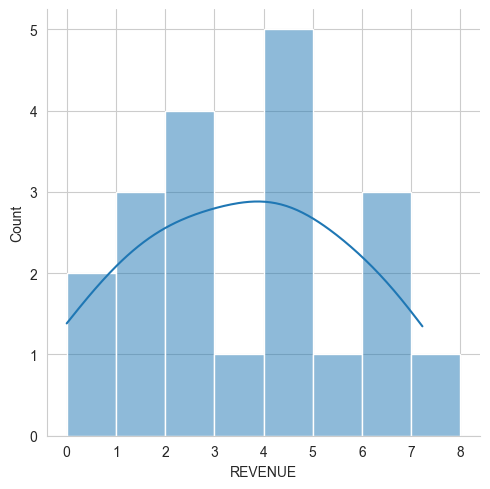

In [21]:
import seaborn as sns
sns.set_style("whitegrid")

df = sim.res[0].veh_exp

#sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

#ax = sns.histplot(df.REVENUE, kde=True, binwidth=1)


ax = sns.displot(df.REVENUE, kde=True, binwidth=1)


#ax =sns.histplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

In [22]:
sim.res[0].veh_exp['REVENUE'].to_list()

[0.0,
 2.4768,
 7.229700000000001,
 1.584,
 3.5496000000000003,
 4.368,
 6.140700000000001,
 4.3308,
 1.2468,
 5.7552,
 2.9676,
 6.841800000000001,
 4.2228,
 6.0786,
 2.4192,
 0.0,
 1.0572,
 2.2932,
 4.4604,
 4.6476]

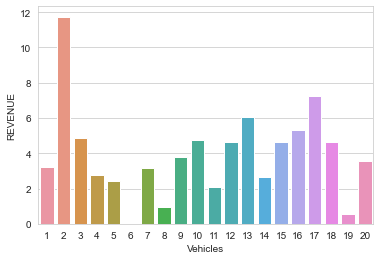

In [75]:
import seaborn as sns
sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver

In [18]:
sim.res[0].all_kpi # All driver revenue 

18.246000000000002

# Strategy 3: 
# params.kpi = 3 (Private ride)


In [34]:
params.kpi = 3

In [35]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

30-03-23 13:12:59-WARNING-Setting up 1h simulation at 2023-03-30 12:16:49 for 20 vehicles and 500 passengers in Delft, Netherlands
0.5
30-03-23 13:13:01-CRITICAL-this is request 0 with [0, 636, 1256, 1314, 1490, 2214, 2253, 2873, 2989, 5113] available rides.
30-03-23 13:13:01-CRITICAL-ride 0 available [1]
30-03-23 13:13:01-CRITICAL-ride 636 available [0, 1]
30-03-23 13:13:01-CRITICAL-ride 1256 available [1, 0]
30-03-23 13:13:01-CRITICAL-ride 1314 available [1, 0]
30-03-23 13:13:01-CRITICAL-ride 1490 available [1, 0]
30-03-23 13:13:01-CRITICAL-ride 2214 available [1, 0]
30-03-23 13:13:01-CRITICAL-ride 2253 available [1, 0]
30-03-23 13:13:01-CRITICAL-ride 2873 available [1, 0]
30-03-23 13:13:01-CRITICAL-ride 2989 available [1, 0]
30-03-23 13:13:01-CRITICAL-ride 5113 available [1, 0, 0]
30-03-23 13:13:01-CRITICAL-this is reuqest 0 with [0, 636, 1256, 1314, 1490, 2214, 2253, 2873, 2989, 5113] still available rides.
private rides
30-03-23 13:13:01-CRITICAL-vehicle 1 has 10 choices
0.5
30-03

In [36]:
df = sim.res[0].veh_exp

In [37]:
df.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/PrivateRide.csv')

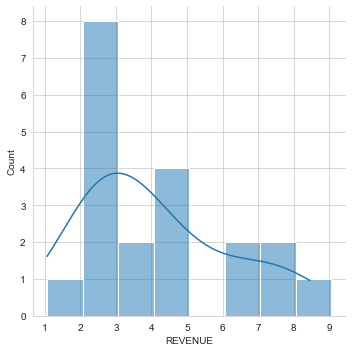

In [38]:
import seaborn as sns
sns.set_style("whitegrid")

df = sim.res[0].veh_exp

#sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

#ax = sns.histplot(df.REVENUE, kde=True, binwidth=1)


ax = sns.displot(df.REVENUE, kde=True, binwidth=1)


#ax =sns.histplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

In [88]:
sim.res[0].veh_exp['REVENUE'].to_list()

[3.1992,
 11.745000000000001,
 3.78,
 7.2696,
 2.064,
 0.0,
 2.4215999999999998,
 4.6548,
 4.6668,
 0.564,
 2.6736000000000004,
 2.7504,
 4.768800000000001,
 3.5832,
 0.9359999999999999,
 3.1488,
 6.0336,
 4.8924,
 5.300099999999999,
 4.628699999999999]

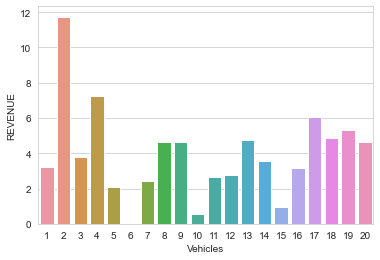

In [89]:
import seaborn as sns

sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")

#ax.set(xlabel=None)
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver 

In [90]:
sim.res[0].all_kpi # All driver revenue 

79.08059999999999

# All in one Simulation  

In [25]:
responses = []
avg_kpi = []
idle_time = []

for i in range(1, 4):
    params.kpi = i
    sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate
    sim.res[0].veh_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/Simulation/veh{}.csv'.format(i))
    sim.res[0].pax_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/Simulation/pax{}.csv'.format(i))
    #driver_data.loc['Cost'] = driver_data.loc['Revenue'].apply(lambda x: x*params.shareability.operating_cost)['Vehicles'] = sim.res[0].veh_exp.index
    #sim.res[0].veh_exp['ds'] = f"{i}"
    
    #responses.append(sim.res[0].veh_exp)
     
   # vehicles = sim.res[0].veh_exp.loc[sim.res[0].veh_exp["nRIDES"] > 0]
    #no_of_veh = len(vehicles)
    
    #avg_kpi.append(sim.res[0].all_kpi/no_of_veh)
    #idle_time.append(vehicles['IDLE'].sum()/no_of_veh)
    
    #_inData.sblts.rides['commission'] = _inData.sblts.rides.apply(lambda row: row.fare*sp.comm_rate, axis=1)
    

0.5
27-03-23 09:26:59-CRITICAL-this is request 0 with [0, 902, 2444, 2559, 3335, 4457, 6295] available rides.
27-03-23 09:26:59-CRITICAL-ride 0 available [1]
27-03-23 09:26:59-CRITICAL-ride 902 available [0, 1]
27-03-23 09:26:59-CRITICAL-ride 2444 available [1, 0]
27-03-23 09:26:59-CRITICAL-ride 2559 available [1, 0]
27-03-23 09:26:59-CRITICAL-ride 3335 available [1, 0]
27-03-23 09:26:59-CRITICAL-ride 4457 available [0, 1]
27-03-23 09:26:59-CRITICAL-ride 6295 available [0, 1, 0]
27-03-23 09:26:59-CRITICAL-this is reuqest 0 with [0, 902, 2444, 2559, 3335, 4457, 6295] still available rides.
Profit Maximization
27-03-23 09:26:59-CRITICAL-vehicle 1 has 7 choices
0.5
27-03-23 09:26:59-CRITICAL-this is request 1 with [1, 1262, 1263, 1319, 2986, 3542, 3566, 5009, 5010, 5891] available rides.
27-03-23 09:26:59-CRITICAL-ride 1 available [1]
27-03-23 09:26:59-CRITICAL-ride 1262 available [0, 1]
27-03-23 09:26:59-CRITICAL-ride 1263 available [0, 1]
27-03-23 09:26:59-CRITICAL-ride 1319 available [

# Performance Parameters for Driver

In [26]:
import pandas as pd
index = pd.Index(['Revenue', 'Profit', 'Cost', 'Idle Time'])
driver_data = pd.DataFrame({"Profit Maximization":[], "Pooled Ride": [], "Private Ride": []})
driver_data.loc['Revenue'] = avg_kpi
driver_data.loc['Idle Time'] = idle_time
driver_data.loc['Cost'] = driver_data.loc['Revenue'].apply(lambda x: x*params.shareability.operating_cost)

ValueError: cannot set a row with mismatched columns

In [ ]:
driver_data

In [ ]:
csv_data = driver_data.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/nV20.csv')

In [ ]:
print('\nCSV String:\n', csv_data)